In [4]:
import sqlite3
conn = sqlite3.connect("../../../Sweden_timelines.sqlite3")
c = conn.cursor()



In [5]:
from datetime import datetime
from dateutil import parser

def user_timeline(userID):
    lats, lngs, ts = [], [], []
    for row in c.execute("SELECT coord_lat, coord_long, time FROM records LEFT JOIN geo on records.id = geo.rec_id where user_id = ? and geo_label = 1", (userID, )):
        lats.append(row[0])
        lngs.append(row[1])
        ts.append(parser.parse(row[2]))
    return lats, lngs, ts

def user_timelines():
    lats, lngs, ts = [], [], []
    for row in c.execute("SELECT coord_lat, coord_long, time FROM records LEFT JOIN geo on records.id = geo.rec_id and geo_label = 1 LIMIT 100000"):
        lats.append(row[0])
        lngs.append(row[1])
        ts.append(parser.parse(row[2]))
    return lats, lngs, ts

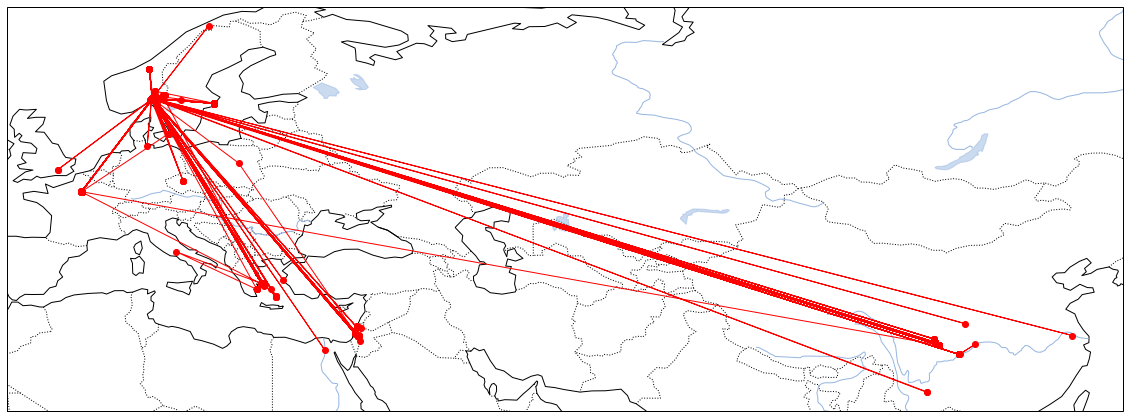

In [7]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

lats, lngs, ts = user_timeline(244)

plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
#ax.stock_img()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
#ax.set_extent((0, 20, 30, 60), crs=ccrs.PlateCarree())
plt.plot(lngs, lats, linewidth=1, marker='o', color='red', transform=ccrs.PlateCarree())

plt.show()


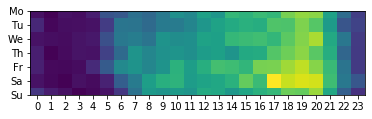

In [8]:
import numpy as np

hm = np.zeros((7, 24))
_, _, ts = user_timelines()

for t in ts:
    hm[t.isoweekday() - 1][t.hour] += 1

fig, ax = plt.subplots()
im = ax.imshow(hm)
ax.set_xticks(np.arange(24))
ax.set_yticks(np.arange(7))
ax.set_yticklabels(["Mo", "Tu", "We", "Th", "Fr", "Sa", "Su"])

plt.show()